# **STAT 301 – Final Report - Group 5**

---

### **Group Members: Mu Ye Liu, Taha Memon, Sajid Mahmood**

---

# **1. Introduction**

Airbnb has revolutionized the short-term rental indutry, whereby it provides tourists with housing units through hosts willing to give them shared or full houses. It has matured to be a wolrdwide marketplace with prices being driven by many factors such as the nature of the property and the host, demand created by the guests and genographical loation.

It is important to understand the factors of Airbnb price to both the market analysts as well as the host. Strategic pricing can maximize occupancy and revenue to the hosts or can further give insight to the researchers on how the market activities and preferences can interpolate into the sharing economy.

The dataset we analyze contains Airbnb listings from several major European cities, including **Amsterdam, Athens, and Berlin**, with separate data for **weekdays and weekends**. Each listing includes information from the following variables:

| Variable                    | Description                                               | Type               |
|----------------------------|-----------------------------------------------------------|--------------------|
| `realSum`                  | Price of the Airbnb listing per night ($USD)              | Numerical          |
| `room_type`                | Type of room being offered (e.g., private room)           | Categorical        |
| `room_shared`              | Whether or not the room is shared                         | Binary             |
| `room_private`             | Whether or not the room is private                        | Binary             |
| `person_capacity`          | Maximum number of people the room can support             | Numerical          |
| `host_is_superhost`        | Whether or not the host is a superhost                    | Binary             |
| `multi`                    | Whether or not the listing is for multiple rooms          | Binary             |
| `biz`                      | Whether or not the listing is for business purposes       | Binary             |
| `cleanliness_rating`        | Rating of how clean the room is                          | Numerical          |
| `guest_satisfaction_overall` | Overall guest satisfaction of the listing               | Numerical          |
| `bedrooms`                 | Number of bedrooms in the listing                         | Numerical          |
| `dist`                     | Distance of the listing to the city centre                | Numerical          |
| `metro_dist`               | Distance to the closest subway station                    | Numerical          |
| `lng`                      | Longitude of the listing’s location                       | Numerical          |
| `lat`                      | Latitude of the listing’s location                        | Numerical          |


Even though there are many variables, we will only use the following covariates (input variables) along with the `realSum` response: `guest_satisfaction_overall`, `cleanliness_rating`, and `room_type`.

## **Research Question**

How is the quality of the Airbnb such as the overall guest satisfaction and cleaniness scores associated with the listing price for each room type in USD?

---

# **2a. Exploratory Data Analysis (EDA)**

At this point, we would like to examine and clean the data and proceed with the answer to our research question:


This involves:
1. It shows that it is possible to load the dataset to R.
2. Cleaning and wrangling the data into a state that is readable and usable.
3. Production of relevant visualization to determine pivoting patterns and potential issues in modeling.

###  **Load the Data**

In total, we have **six files**, which were merged into a single dataset using **R**.
Test.

In [27]:
# Load libraries
library(readr)
library(dplyr)
library(ggplot2)

# Read in all six CSVs
amsterdam_weekdays <- read_csv("amsterdam_weekdays.csv")
amsterdam_weekends <- read_csv("amsterdam_weekends.csv")
athens_weekdays <- read_csv("athens_weekdays.csv")
athens_weekends <- read_csv("athens_weekends.csv")
berlin_weekdays <- read_csv("berlin_weekdays.csv")
berlin_weekends <- read_csv("berlin_weekends.csv")

New names:
• `` -> `...1`
Rows: 1103 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 977 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 2653 Columns: 20
── Column specification ──────────────────

###  **Clean and Wrangle the Data**

We'll now combine the datasets and add two columns that indicate the specific dataset it came from:
- `city`: name of the city (Amsterdam, Athens, Berlin)
- `day_type`: either `"weekday"` or `"weekend"`

We'll also:
- Convert logical and categorical columns to appropriate types
- Ensure a clean, tidy structure for plotting and modeling

In [28]:
# Add city and day_type to each dataset
amsterdam_weekdays$city <- "Amsterdam"
amsterdam_weekends$city <- "Amsterdam"
athens_weekdays$city <- "Athens"
athens_weekends$city <- "Athens"
berlin_weekdays$city <- "Berlin"
berlin_weekends$city <- "Berlin"

amsterdam_weekdays$day_type <- "weekday"
amsterdam_weekends$day_type <- "weekend"
athens_weekdays$day_type <- "weekday"
athens_weekends$day_type <- "weekend"
berlin_weekdays$day_type <- "weekday"
berlin_weekends$day_type <- "weekend"

# Combine all datasets
airbnb <- bind_rows(
  amsterdam_weekdays,
  amsterdam_weekends,
  athens_weekdays,
  athens_weekends,
  berlin_weekdays,
  berlin_weekends
)

# Convert to factors
airbnb_clean <- airbnb %>%
  mutate(
    city = as.factor(city),
    day_type = as.factor(day_type),
    host_is_superhost = as.factor(host_is_superhost),
    biz = as.factor(biz),
    room_type = as.factor(room_type)
  )

# Only include the relevant variables
airbnb_clean_filtered <- airbnb_clean |> 
  select(realSum, cleanliness_rating, guest_satisfaction_overall, room_type)

tail(airbnb_clean_filtered)

realSum,cleanliness_rating,guest_satisfaction_overall,room_type
<dbl>,<dbl>,<dbl>,<fct>
156.58596,9,91,Entire home/apt
84.83687,10,100,Private room
134.61718,10,98,Private room
134.61718,10,93,Private room
160.09161,9,86,Entire home/apt
359.68028,10,100,Entire home/apt


Here, our data is in tidy format.

### **Exploratory Data Visualization**

We will now create scatterplots to preliminarily explore the pairwise relationship between continuous variable (`cleanliness_score` and `guest_satisfaction_overall`) and the Airbnb listing price response variable. For each scatterplot, We will plot regression lines for each `room_type` category to see whether or not the relationships between the continuous varaibles and the response is the same for each room type category, or if the plots show that it is different. 

**Scatterplot of `realSum` against `cleanliness_score` with `room_type` categories:**

In [ ]:
realSum_cleanliness_rating_scatterplot <-
    airbnb_clean_filtered |>
    ggplot() +
    geom_point(aes(x = cleanliness_rating, y = realSum, color = room_type)) +
    geom_smooth(method = "lm", aes(x = cleanliness_rating, y = realSum, color = room_type)) +
    coord_cartesian(ylim = c(0, 2500)) +
    labs(title = "Airbnb Prices vs Cleaniness Score for each room type", x = "Cleaniness Rating Score", y = "Listing Price (USD)", color = "Room Type")

realSum_cleanliness_rating_scatterplot

ERROR: Error in ggplot(airbnb_clean_filtered): could not find function "ggplot"


**Scatterplot of `realSum` against `guest_satisfaction_overall` with `room_type` categories:**

`geom_smooth()` using formula = 'y ~ x'


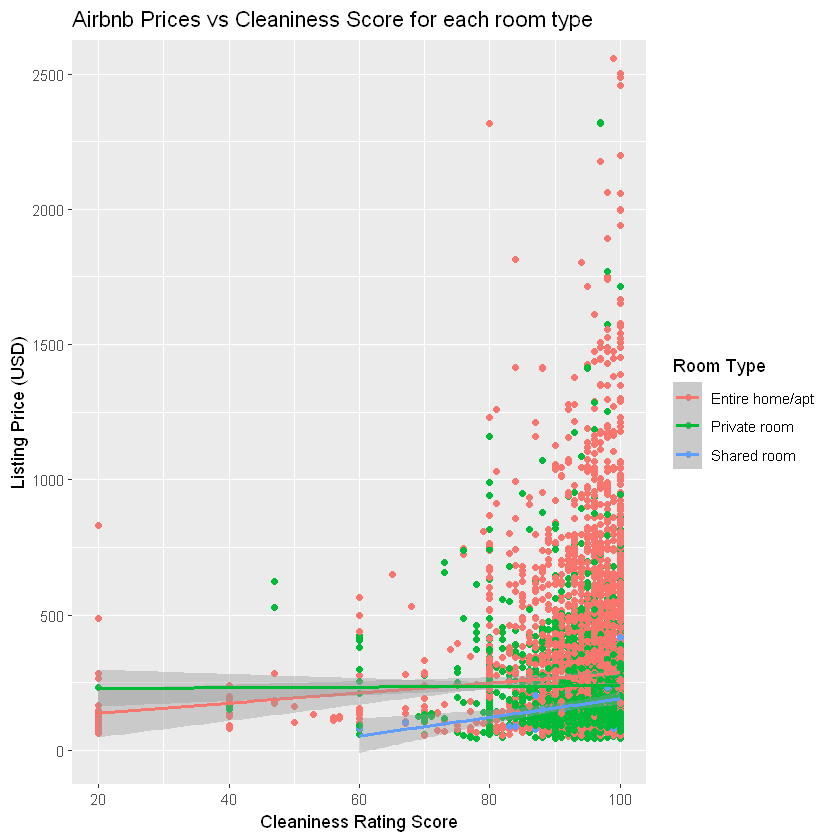

In [30]:
realSum_cleanliness_rating_scatterplot <-
    airbnb_clean_filtered |>
    ggplot() +
    geom_point(aes(x = guest_satisfaction_overall, y = realSum, color = room_type)) +
    geom_smooth(method = "lm", aes(x = guest_satisfaction_overall, y = realSum, color = room_type)) +
    coord_cartesian(ylim = c(0, 2500)) +
    labs(title = "Airbnb Prices vs Cleaniness Score for each room type", x = "Cleaniness Rating Score", y = "Listing Price (USD)", color = "Room Type")

realSum_cleanliness_rating_scatterplot

### **Summary Tables**

Put any summary tables relevant to our analysis here:

# **2b: Analysis Plan**

Based on our scatterplots in the exploratory data analysis section, we notice that there is a somewhat positive association between the input variables and the response. Also, the associations seem to be different for all 3 categories. Therefore, we will start with a full model with interactions. 

The full model with interactions will have 9 beta coefficients, including: 

- Intercept
- 2 Continuous variables
- 2 Dummy variables for the room type category
- 4 Intereactions terms, which includes one for each continuous variable and categorical dummy variable.

We've noticed that we have a heteroscedastitcity issue based on our exploratory scatterplots, as the variance of the residuals increases when we both the `cleanliness_rating` and `guest_satisfaction_overall` increases.
To tackle this problem, we will perform a log transform. by using `mutate()` on our cleaned dataset to get log of the continuous variables. 

*We will not include VIF's becasue LASSO model selection is designed to handle it. Multicollinearity is a problem with stepwise selection, but not for LASSO.

We will then perform model selection using the LASSO method. We will start by finding an optimal value for lambda using 10-fold cross validation. We would use `cv.glmnet()` to perform the 10-fold cross validation, and then extract the coefficient. 

After finding the optimal value for lambda, perform LASSO selection. We will base our results on the varibles that LASSO sets to 0. We chose this method becasue when a beta coefficient is 0, then it is shown to not significantly affect the listing price response. Therefore there is not a significant association